### 神经网络算法详情参考： 
### https://blog.csdn.net/luanpeng825485697/article/details/79009050 
### https://blog.csdn.net/luanpeng825485697/article/details/79009154 
### https://blog.csdn.net/luanpeng825485697/article/details/79009223

---
# 多层感知器

### 多层感知器的优点:

+ 可以学习得到非线性模型。
+ 使用 ```partial_fit``` 可以学习得到实时模型(在线学习)。

### 多层感知器(MLP)的缺点:

+  具有隐藏层的 MLP 具有非凸的损失函数，它有不止一个的局部最小值。因此不同的随机权 - 重初始化会导致不同的验证集准确率。
+ MLP 需要调试一些超参数，例如隐藏层神经元的数量、层数和迭代轮数。
+ MLP 对特征归一化很敏感.

---
# 神经网络分类

### MLPClassifier 类实现了通过 Backpropagation 进行训练的多层感知器（MLP）算法。

### 目前， MLPClassifier 只支持交叉熵损失函数，通过运行 predict_proba 方法进行概率估计。

### MLP 算法使用的是反向传播的方式。 更准确地说，它使用了通过反向传播计算得到的梯度和某种形式的梯度下降来进行训练。 对于分类来说，它最小化交叉熵损失函数，为每个样本 x 给出一个向量形式的概率估计 P(y|x)

每层网络层系数矩阵维度：
 [(2, 5), (5, 2), (2, 1)]
预测结果： [0.]
预测结果概率：
 [[1.00000000e+000 6.63279744e-305]]
第1层网络层:
权重矩阵维度: (2, 5)
系数矩阵:
 [[-1.09538274  0.36309949 -1.27227154 -0.39894637 -0.15406402]
 [-0.50033282 -1.97053658 -1.39997854  4.38015871  0.30071309]]
第2层网络层:
权重矩阵维度: (5, 2)
系数矩阵:
 [[-0.60507595 -0.25381544]
 [-2.00854543 -0.67673634]
 [-2.07756639  0.12092846]
 [ 2.90811389 -0.49062085]
 [ 0.22256248  0.64391743]]
第3层网络层:
权重矩阵维度: (2, 1)
系数矩阵:
 [[-3.68728924]
 [-0.88764417]]


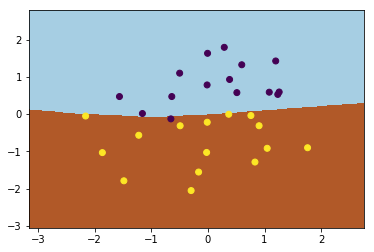

In [2]:
# =============神经网络用于分类=============  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.neural_network import MLPClassifier  
from sklearn.preprocessing import StandardScaler  
data = [  
    [-0.017612, 14.053064, 0],[-1.395634, 4.662541, 1],[-0.752157, 6.53862, 0],[-1.322371, 7.152853, 0],[0.423363, 11.054677, 0],  
    [0.406704, 7.067335, 1],[0.667394, 12.741452, 0],[-2.46015, 6.866805, 1],[0.569411, 9.548755, 0],[-0.026632, 10.427743, 0],  
    [0.850433, 6.920334, 1],[1.347183, 13.1755, 0],[1.176813, 3.16702, 1],[-1.781871, 9.097953, 0],[-0.566606, 5.749003, 1],  
    [0.931635, 1.589505, 1],[-0.024205, 6.151823, 1],[-0.036453, 2.690988, 1],[-0.196949, 0.444165, 1],[1.014459, 5.754399, 1],  
    [1.985298, 3.230619, 1],[-1.693453, -0.55754, 1],[-0.576525, 11.778922, 0],[-0.346811, -1.67873, 1],[-2.124484, 2.672471, 1],  
    [1.217916, 9.597015, 0],[-0.733928, 9.098687, 0],[1.416614, 9.619232, 0],[1.38861, 9.341997, 0],[0.317029, 14.739025, 0]  
]  
 
dataMat = np.array(data)  
X=dataMat[:,0:2]  
y = dataMat[:,2]  
# 神经网络对数据尺度敏感，所以最好在训练前标准化，或者归一化，或者缩放到[-1,1]  
scaler = StandardScaler() # 标准化转换  
scaler.fit(X)  # 训练标准化对象  
X = scaler.transform(X)   # 转换数据集  
# solver='lbfgs',  MLP的求解方法：L-BFGS 在小数据上表现较好，Adam 较为鲁棒，SGD在参数调整较优时会有最佳表现（分类效果与迭代次数）；SGD标识随机梯度下降。  
# alpha:L2的参数：MLP是可以支持正则化的，默认为L2，具体参数需要调整  
# hidden_layer_sizes=(5, 2) hidden层2层,第一层5个神经元，第二层2个神经元)，2层隐藏层，也就有3层神经网络  
 
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)  # 神经网络输入为2，第一隐藏层神经元个数为5，第二隐藏层神经元个数为2，输出结果为2分类。  
clf.fit(X, y)  
print('每层网络层系数矩阵维度：\n',[coef.shape for coef in clf.coefs_])  
y_pred = clf.predict([[0.317029, 14.739025]])  
print('预测结果：',y_pred)  
y_pred_pro =clf.predict_proba([[0.317029, 14.739025]])  
print('预测结果概率：\n',y_pred_pro)  
 
cengindex = 0  
for wi in clf.coefs_:  
    cengindex += 1  # 表示底第几层神经网络。  
    print('第%d层网络层:' % cengindex)  
    print('权重矩阵维度:',wi.shape)  
    print('系数矩阵:\n',wi)  
 
 
# 绘制分割区域  
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # 寻找每个维度的范围  
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # 寻找每个维度的范围  
xx1, xx2 = np.meshgrid(np.arange(x_min, x_max, 0.01),np.arange(y_min, y_max,0.01)) # 在特征范围以0.01位步长预测每一个点的输出结果  
Z = clf.predict(np.c_[xx1.ravel(), xx2.ravel()]) # 先形成待测样本的形式，在通过模型进行预测。  
Z = Z.reshape(xx1.shape) # 将输出结果转换为和网格的矩阵形式，以便绘图  
# 绘制区域网格图  
plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Paired)  
# 绘制样本点  
plt.scatter(X[:,0],X[:,1],c=y)  
plt.show()  

---
# 神经网络回归

### MLPRegressor 类多层感知器（MLP）的实现，在使用反向传播进行训练时的输出层没有使用激活函数，也可以看作是使用恒等函数（identity function）作为激活函数。 因此，它使用平方误差作为损失函数，输出是一组连续值。

### MLPRegressor 还支持多输出回归，其中一个样本可以有多个目标值。



In [3]:
# # =============神经网络用于回归=============  

import numpy as np  
from sklearn.neural_network import MLPRegressor  # 多层线性回归  
from sklearn.preprocessing import StandardScaler  
data = [  
         [ -0.017612,14.053064,14.035452],[ -1.395634, 4.662541, 3.266907],[ -0.752157, 6.53862,5.786463],[ -1.322371, 7.152853, 5.830482],  
         [0.423363,11.054677,11.47804 ],[0.406704, 7.067335, 7.474039],[0.667394,12.741452,13.408846],[ -2.46015,6.866805, 4.406655],  
         [0.569411, 9.548755,10.118166],[ -0.026632,10.427743,10.401111],[0.850433, 6.920334, 7.770767],[1.347183,13.1755,14.522683],  
         [1.176813, 3.16702,4.343833],[ -1.781871, 9.097953, 7.316082],[ -0.566606, 5.749003, 5.182397],[0.931635, 1.589505, 2.52114 ],  
         [ -0.024205, 6.151823, 6.127618],[ -0.036453, 2.690988, 2.654535],[ -0.196949, 0.444165, 0.247216],[1.014459, 5.754399, 6.768858],  
         [1.985298, 3.230619, 5.215917],[ -1.693453,-0.55754, -2.250993],[ -0.576525,11.778922,11.202397],[ -0.346811,-1.67873, -2.025541],  
         [ -2.124484, 2.672471, 0.547987],[1.217916, 9.597015,10.814931],[ -0.733928, 9.098687, 8.364759],[1.416614, 9.619232,11.035846],  
         [1.38861,9.341997,10.730607],[0.317029,14.739025,15.056054]  
]  

dataMat = np.array(data)  
X=dataMat[:,0:2]  
y = dataMat[:,2]  
scaler = StandardScaler() # 标准化转换  
scaler.fit(X)  # 训练标准化对象  
X = scaler.transform(X)   # 转换数据集  

# solver='lbfgs',  MLP的求解方法：L-BFGS 在小数据上表现较好，Adam 较为鲁棒，SGD在参数调整较优时会有最佳表现（分类效果与迭代次数）；SGD标识随机梯度下降。  
# alpha:L2的参数：MLP是可以支持正则化的，默认为L2，具体参数需要调整  
# hidden_layer_sizes=(5, 2) hidden层2层,第一层5个神经元，第二层2个神经元)，2层隐藏层，也就有3层神经网络  
clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)  
clf.fit(X, y)  
print('预测结果：', clf.predict([[0.317029, 14.739025]]))  # 预测某个输入对象  

cengindex = 0  
for wi in clf.coefs_:  
    cengindex += 1  # 表示底第几层神经网络。  
    print('第%d层网络层:' % cengindex)  
    print('权重矩阵维度:',wi.shape)  
    print('系数矩阵：\n',wi)  

预测结果： [24.27658241]
第1层网络层:
权重矩阵维度: (2, 5)
系数矩阵：
 [[-0.34864455  2.65773508 -0.70101319  1.02694781 -2.49646505]
 [-0.82708778  0.91662071 -3.16135291  1.71483441 -3.05764795]]
第2层网络层:
权重矩阵维度: (5, 2)
系数矩阵：
 [[ 7.84607871e-01  4.03120891e+00]
 [-6.12095342e-01 -1.71533155e-03]
 [-8.58683112e-01  3.72888728e+00]
 [-2.10267166e-01 -5.50536852e-04]
 [ 2.65650235e-01  4.58089185e-04]]
第3层网络层:
权重矩阵维度: (2, 1)
系数矩阵：
 [[ 2.53837446]
 [-0.28218186]]


---
# 正则化

### MLPRegressor 类和 MLPClassifier 类都使用参数 alpha 作为正则化( L2 正则化)系数，正则化通过惩罚大数量级的权重值以避免过拟合问题。